In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances_argmin_min

In [153]:
df=pd.read_csv('crime.csv')

In [154]:
locations = df[['Latitude', 'Longitude']]
count=df['HOUR'].isna().sum()

In [155]:
print(count)
df

54362


,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
...,...,...,...,...,...,...,...,...,...,...,...,...
530647,Break and Enter Residential/Other,2017,3,3,9.0,16.0,31XX ADANAC ST,Hastings-Sunrise,497265.49,5458296.71,49.277420,-123.037595
530648,Mischief,2017,5,29,22.0,30.0,14XX E 7TH AVE,Grandview-Woodland,494533.97,5456824.97,49.264163,-123.075129
530649,Offence Against a Person,2017,4,13,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.00,0.00,0.000000,0.000000
530650,Theft from Vehicle,2017,6,5,17.0,0.0,8XX HAMILTON ST,Central Business District,491487.85,5458385.78,49.278168,-123.117031


In [156]:
df['NEIGHBOURHOOD'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 530652 entries, 0 to 530651
Series name: NEIGHBOURHOOD
Non-Null Count   Dtype 
--------------   ----- 
474028 non-null  object
dtypes: object(1)
memory usage: 4.0+ MB


In [157]:
unique= df['NEIGHBOURHOOD'].unique()

In [158]:
unique

array(['Strathcona', 'Kerrisdale', 'Dunbar-Southlands',
       'Grandview-Woodland', 'Sunset', 'West End', nan,
       'Central Business District', 'Hastings-Sunrise',
       'Victoria-Fraserview', 'Fairview', 'Kensington-Cedar Cottage',
       'West Point Grey', 'Shaughnessy', 'Renfrew-Collingwood',
       'Killarney', 'Riley Park', 'Arbutus Ridge', 'Musqueam',
       'Mount Pleasant', 'Kitsilano', 'Stanley Park', 'South Cambie',
       'Marpole', 'Oakridge'], dtype=object)

In [159]:
latitude=df['Latitude']
longitude=df['Longitude']

In [160]:
df.dropna()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
...,...,...,...,...,...,...,...,...,...,...,...,...
530646,Mischief,2017,1,18,14.0,44.0,14XX E HASTINGS ST,Grandview-Woodland,494563.75,5458727.40,49.281276,-123.074746
530647,Break and Enter Residential/Other,2017,3,3,9.0,16.0,31XX ADANAC ST,Hastings-Sunrise,497265.49,5458296.71,49.277420,-123.037595
530648,Mischief,2017,5,29,22.0,30.0,14XX E 7TH AVE,Grandview-Woodland,494533.97,5456824.97,49.264163,-123.075129
530650,Theft from Vehicle,2017,6,5,17.0,0.0,8XX HAMILTON ST,Central Business District,491487.85,5458385.78,49.278168,-123.117031


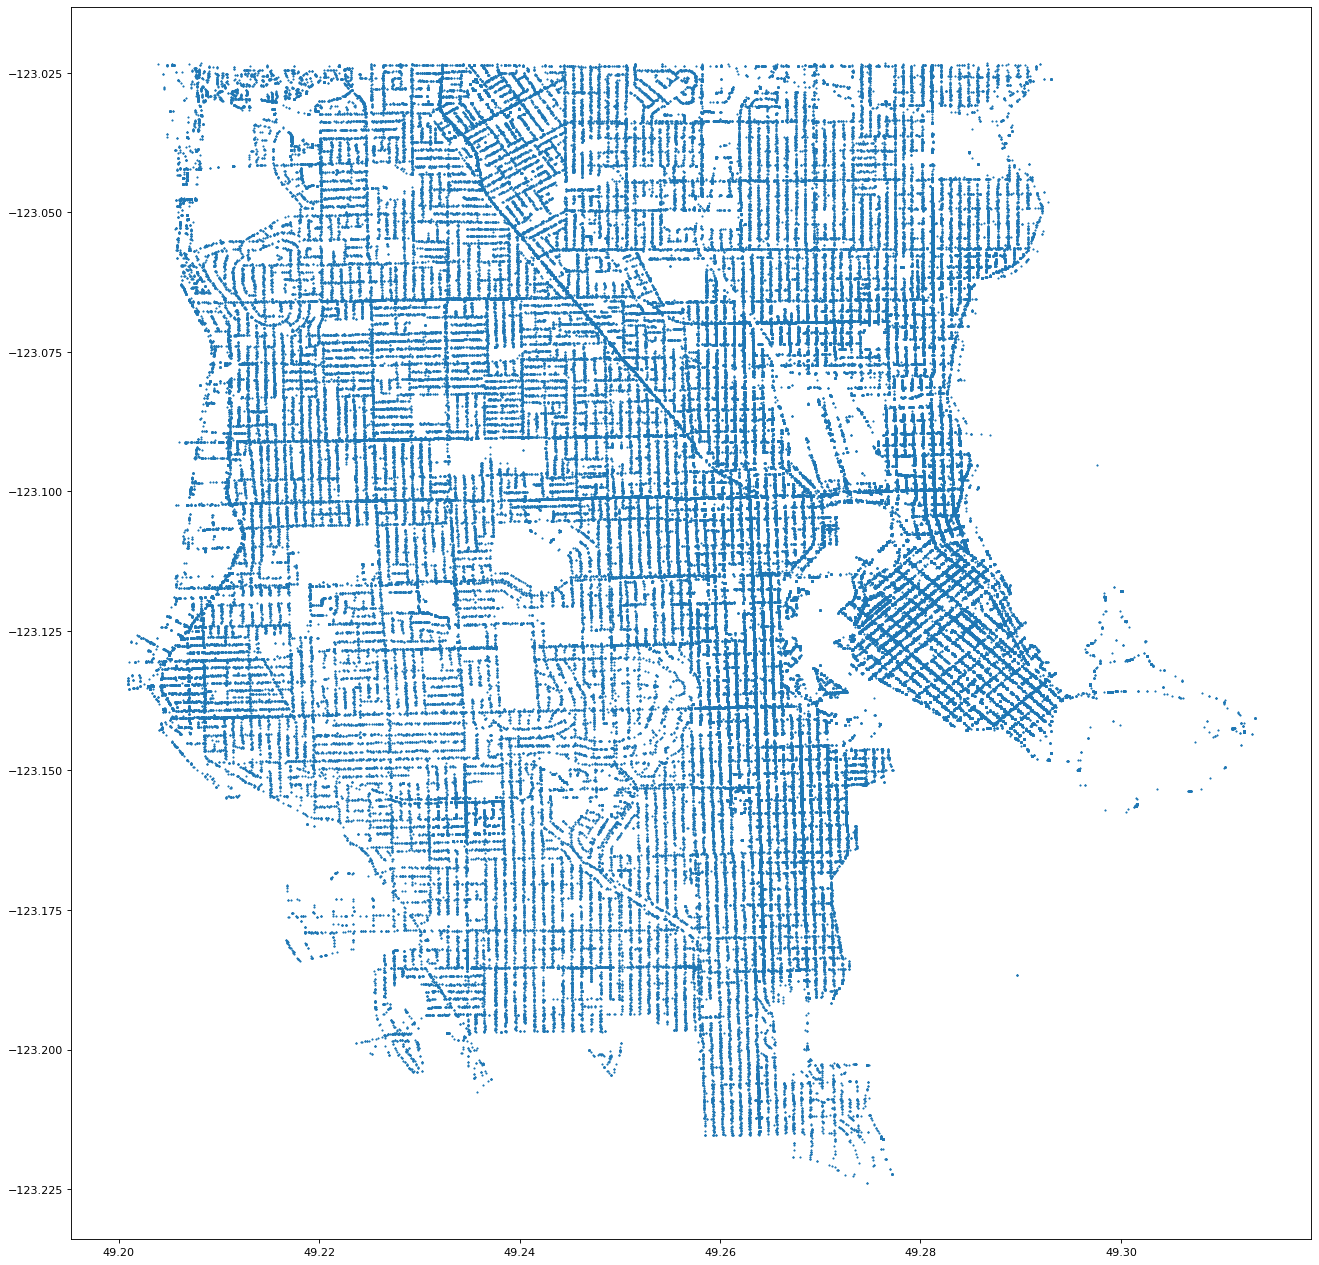

In [201]:
data = df.loc[:, ['Latitude', 'Longitude', 'TYPE']]
data = data.dropna()

data = data[(data.Latitude != 0) & (data.Longitude != 0)]
data = data[(data.Latitude > 49.0) & (data.Latitude < 49.4)]
data = data[(data.Longitude < -123.01) & (data.Longitude > -123.7)]

plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(x = data['Latitude'], y = data['Longitude'], marker='*',s=1)
plt.show()


In [202]:
unique_crimes=df['TYPE'].unique()
unique_crimes

array(['Other Theft', 'Break and Enter Residential/Other', 'Mischief',
       'Break and Enter Commercial', 'Offence Against a Person',
       'Theft from Vehicle',
       'Vehicle Collision or Pedestrian Struck (with Injury)',
       'Vehicle Collision or Pedestrian Struck (with Fatality)',
       'Theft of Vehicle', 'Homicide', 'Theft of Bicycle'], dtype=object)

C:\Users\Ali Rashid\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[0.03520346 0.04848273 0.05175011 0.01634608 0.07596382]
 [0.03520346 0.04848273 0.05175011 0.01634608 0.07596382]
 [0.03520346 0.04848273 0.05175011 0.01634608 0.07596382]
 ...
 [0.01088447 0.07435809 0.05550731 0.04111907 0.05619048]
 [0.00494278 0.08591278 0.05176969 0.05482694 0.04066281]
 [0.01150318 0.07501524 0.05720462 0.04142913 0.057015  ]]
[[  49.27874713 -123.11781133]
 [  49.24630778 -123.04135343]
 [  49.22554456 -123.11058404]
 [  49.27033104 -123.06742578]
 [  49.25927291 -123.15899388]]


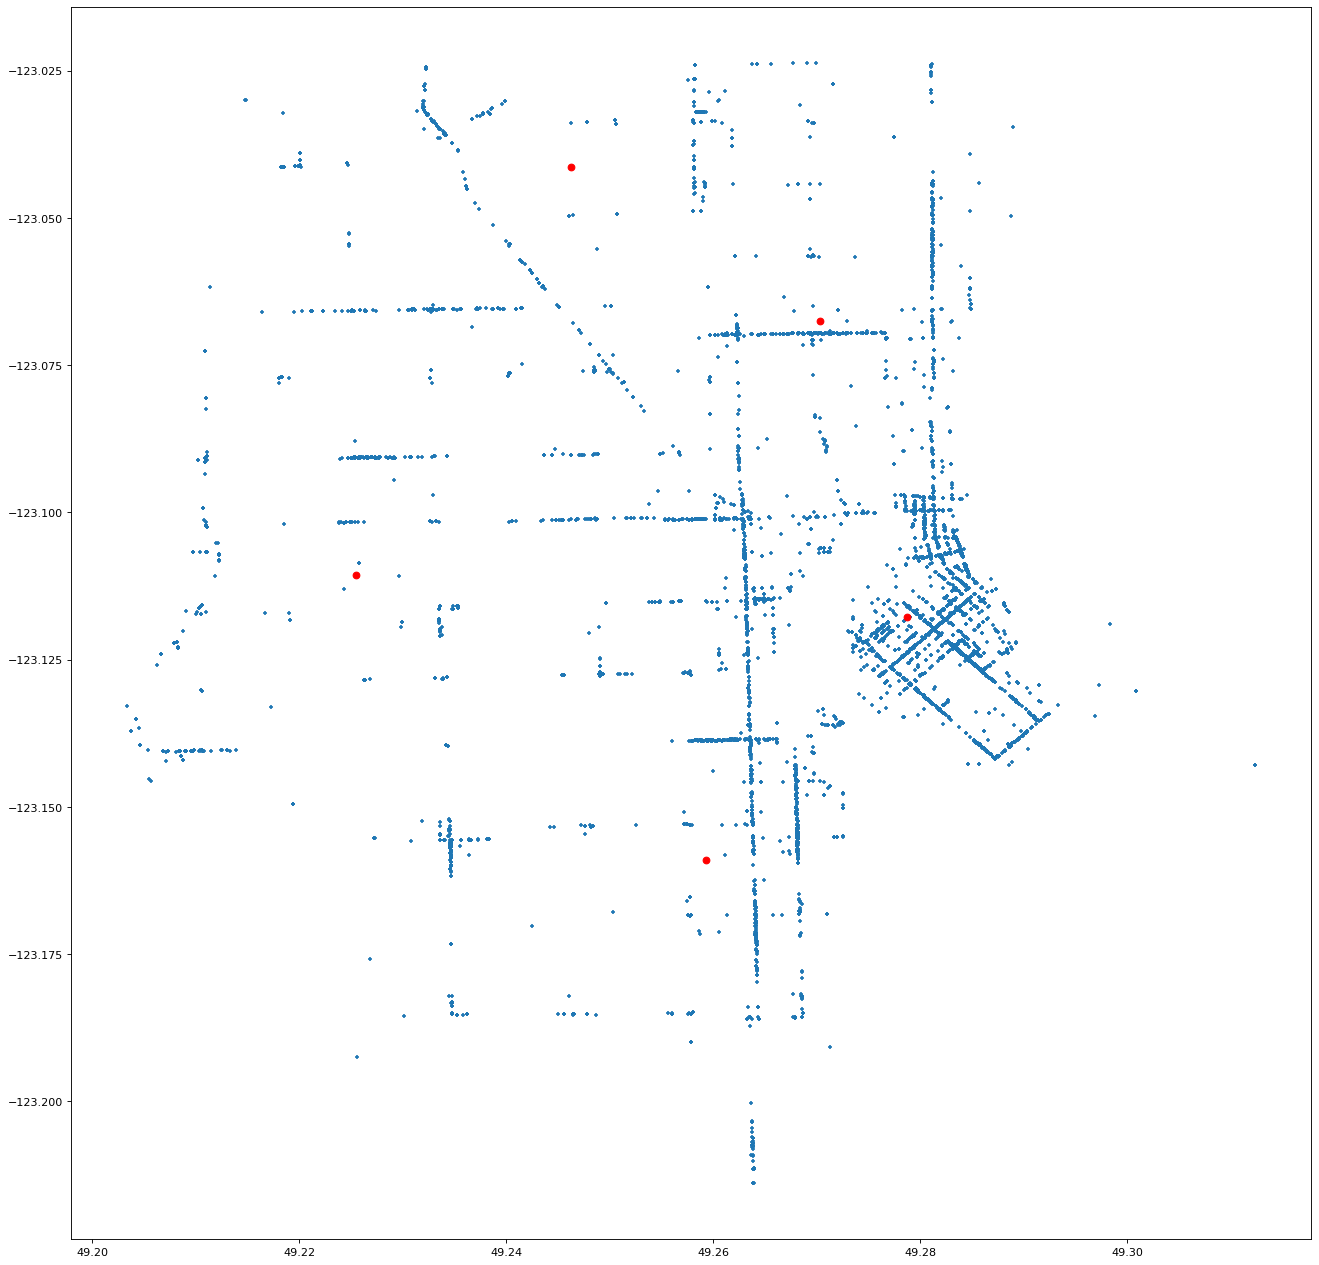

In [203]:
from sklearn.cluster import KMeans

data = data[data["TYPE"].str.contains("Other Theft")]

plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(x = data['Latitude'], y = data['Longitude'], marker='+', s=10)

cor = data.loc[:, ['Latitude', 'Longitude']]
cor = cor.dropna() 
cor = cor.to_numpy()

model = KMeans(n_clusters = 5)
result = model.fit_transform(cor)
centers = model.cluster_centers_

print(result)
print(model.cluster_centers_)

plt.scatter(x = centers[:, 0], y= centers[:, 1], c="red")
plt.show()

In [204]:
unique_crimes=df['TYPE'].unique()

C:\Users\Ali Rashid\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


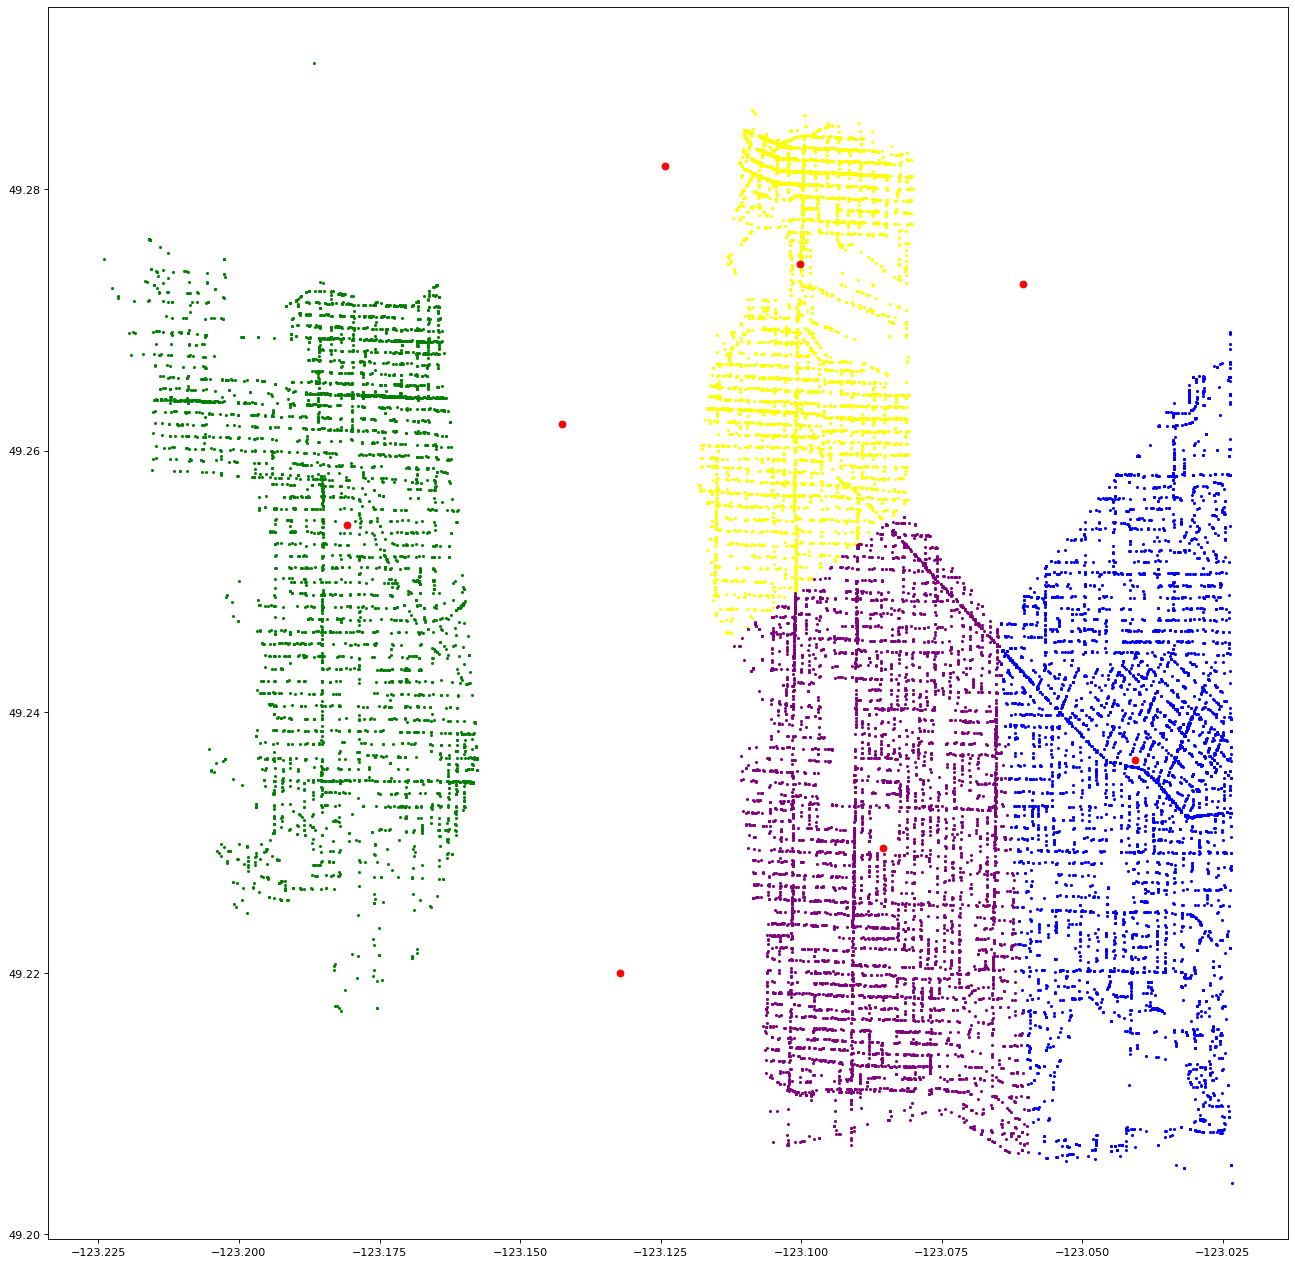

In [205]:
data = df.loc[:, ['Latitude', 'Longitude', 'TYPE']]
data = data.dropna()

data = data[(data.Latitude != 0) & (data.Longitude != 0)]
data = data[(data.Latitude > 49.18) & (data.Latitude < 49.4)]
data = data[(data.Longitude < -123.01) & (data.Longitude > -123.5)]

mischief = data[data['TYPE'].str.contains('Mischief')]

plt.figure(figsize=(20, 20), dpi=80)

cor = mischief.loc[:, ['Longitude', 'Latitude']]
cor = cor.dropna()
cor = cor.to_numpy()

model = KMeans(n_clusters = 8)
result = model.fit_transform(cor)
centers = model.cluster_centers_

group = model.predict(cor)

g0 = cor[group == 0]
g1 = cor[group == 1]
g2 = cor[group == 2]
g3 = cor[group == 3]

plt.scatter(x=g0[:, 0], y = g0[:,1], color = "yellow", s=3)
plt.scatter(x=g1[:, 0], y = g1[:,1], color = "green", s=3)
plt.scatter(x=g2[:, 0], y = g2[:,1], color = "blue", s=3)
plt.scatter(x=g3[:, 0], y = g3[:,1], color = "purple", s=3)
plt.scatter(x=centers[:, 0], y = centers[:, 1], color="red")
plt.show()

C:\Users\Ali Rashid\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


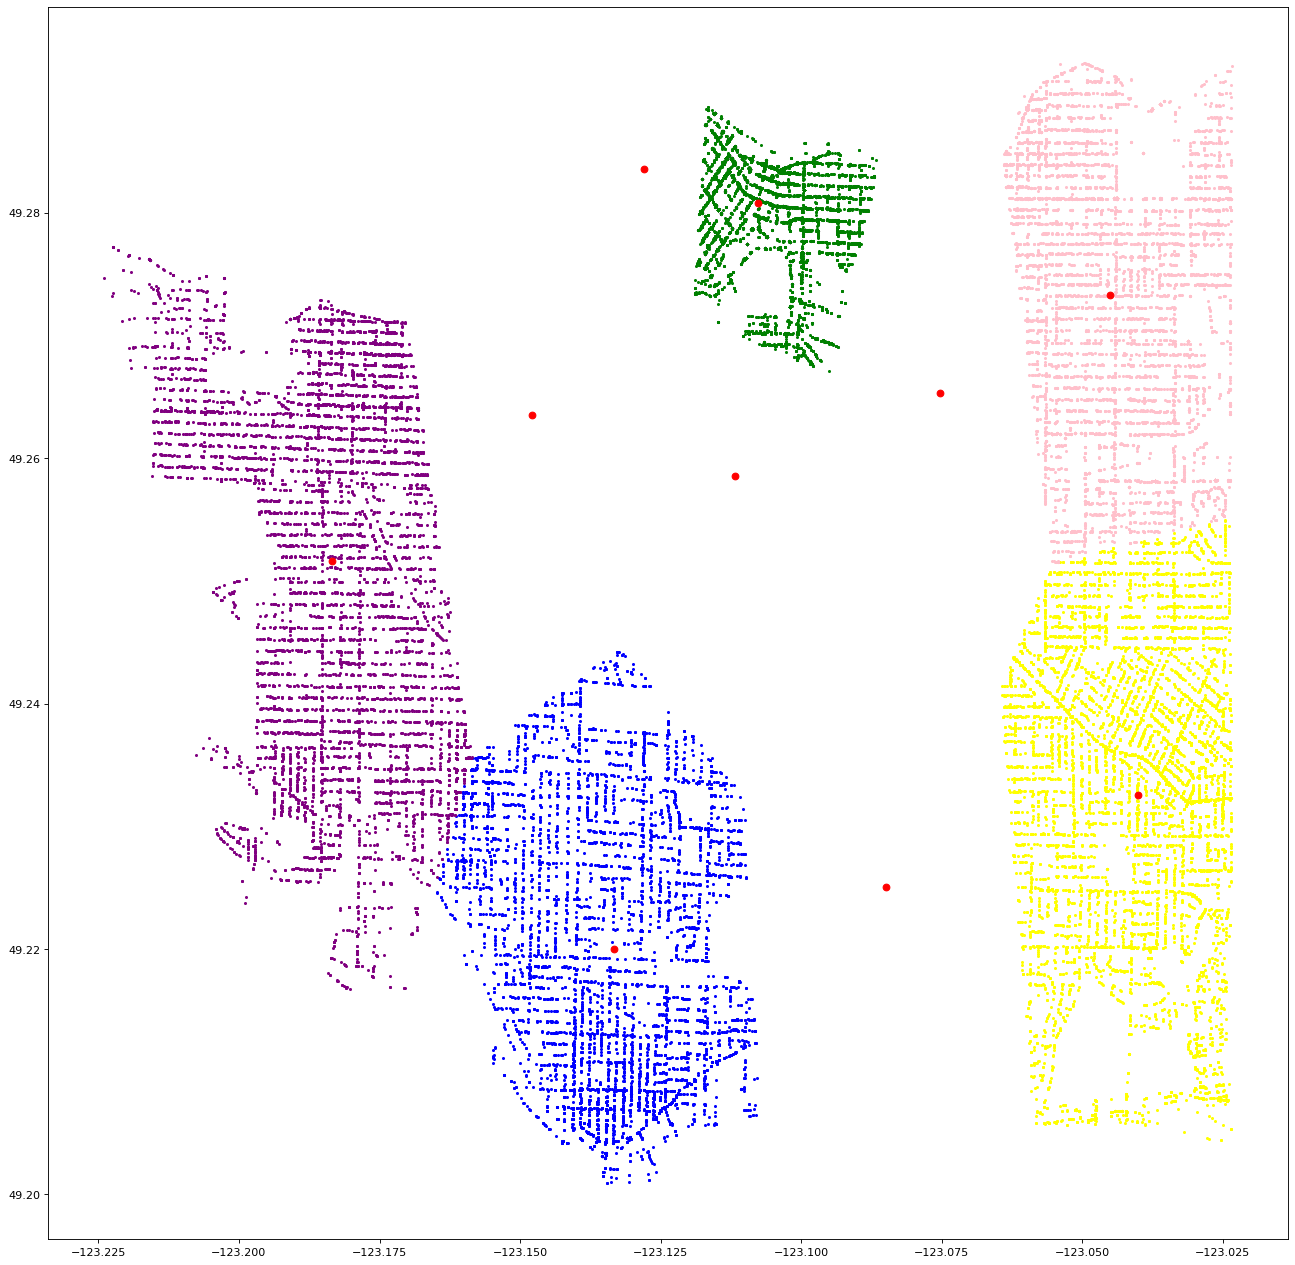

[[-123.04004037   49.2325552 ]
 [-123.10760902   49.28076617]
 [-123.13330128   49.22001666]
 [-123.18346555   49.25158753]
 [-123.04501724   49.27329165]
 [-123.14782361   49.26348979]
 [-123.11173781   49.25857184]
 [-123.12802217   49.28352538]
 [-123.07533378   49.26528404]
 [-123.08496344   49.22501813]]


In [206]:
data = df.loc[:, ['Latitude', 'Longitude', 'TYPE']]
data = data.dropna()

data = data[(data.Latitude != 0) & (data.Longitude != 0)]
data = data[(data.Latitude > 49.18) & (data.Latitude < 49.4)]
data = data[(data.Longitude < -123.01) & (data.Longitude > -123.5)]

mischief = data[data['TYPE'].str.contains('Theft from Vehicle')]

plt.figure(figsize=(20, 20), dpi=80)

cor = mischief.loc[:, ['Longitude', 'Latitude']]
cor = cor.dropna()
cor = cor.to_numpy()

model = KMeans(n_clusters = 10)

  
result = model.fit_transform(cor)
centers = model.cluster_centers_

group = model.predict(cor)

g0 = cor[group == 0]
g1 = cor[group == 1]
g2 = cor[group == 2]
g3 = cor[group == 3]
g4 = cor[group == 4]

plt.scatter(x=g0[:, 0], y = g0[:,1], color = "yellow", s=3)
plt.scatter(x=g1[:, 0], y = g1[:,1], color = "green", s=3)
plt.scatter(x=g2[:, 0], y = g2[:,1], color = "blue", s=3)
plt.scatter(x=g3[:, 0], y = g3[:,1], color = "purple", s=3)
plt.scatter(x=g4[:,0], y = g4[:,1], color = "pink", s=3)
plt.scatter(x=centers[:, 0], y = centers[:, 1], color="red")
plt.show()

print(centers)

In [207]:
cluster_radii = []


for cluster_id in range(model.n_clusters):
   
    cluster_points = cor[group == cluster_id]
    
    distances = np.linalg.norm(cluster_points - centers[cluster_id], axis=1)
    
    cluster_radius = np.max(distances)
    
    cluster_radii.append(cluster_radius)


for i, radius in enumerate(cluster_radii):
    print(f"Cluster {i + 1} Radius: {radius}")

Cluster 1 Radius: 0.03232367900877865
Cluster 2 Radius: 0.021117253504847402
Cluster 3 Radius: 0.03181288326563081
Cluster 4 Radius: 0.04661680393031197
Cluster 5 Radius: 0.02852151458096875
Cluster 6 Radius: 0.02951817298945852
Cluster 7 Radius: 0.02528027891523679
Cluster 8 Radius: 0.03463429706987822
Cluster 9 Radius: 0.025670151193139833
Cluster 10 Radius: 0.0316142399044391
